In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [34]:
st = pd.read_csv('data_extracted/my_shifted_train_data.csv', header=None, names=["time", 'signal', "chans"])

st['signal_diff'] = st['signal'].diff().fillna(0) 
st['signal_rolling_mean'] = st['signal'].rolling(window=50).mean().bfill()

#X = st[["signal", 'signal_diff', 'signal_rolling_mean']]
X = st[["signal", 'signal_rolling_mean']]
y = st["chans"]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [35]:
def plot_signal_and_channels(signal, chans, zero=0, delta=5000):
    plt.figure(figsize=(20, 5))

    plt.subplot(2, 1, 1)
    plt.plot(signal[zero:zero+delta], label='Original Signal', color='blue')
    plt.title('Original Signal')
    plt.legend()

    plt.subplot(2, 1, 2) #data.index
    plt.plot(chans[zero:zero+delta], label='Channels', color='orange')
    plt.title('Channels')
    plt.legend()

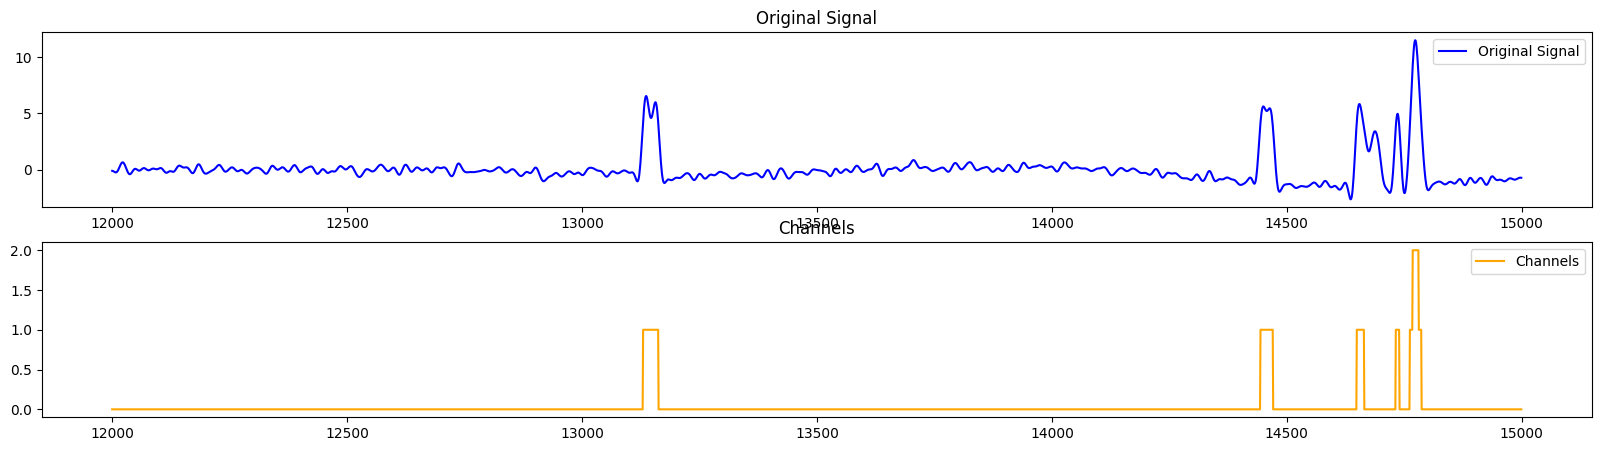

In [41]:
plot_signal_and_channels(st['signal'], st['chans'], zero=12000, delta=3000)  

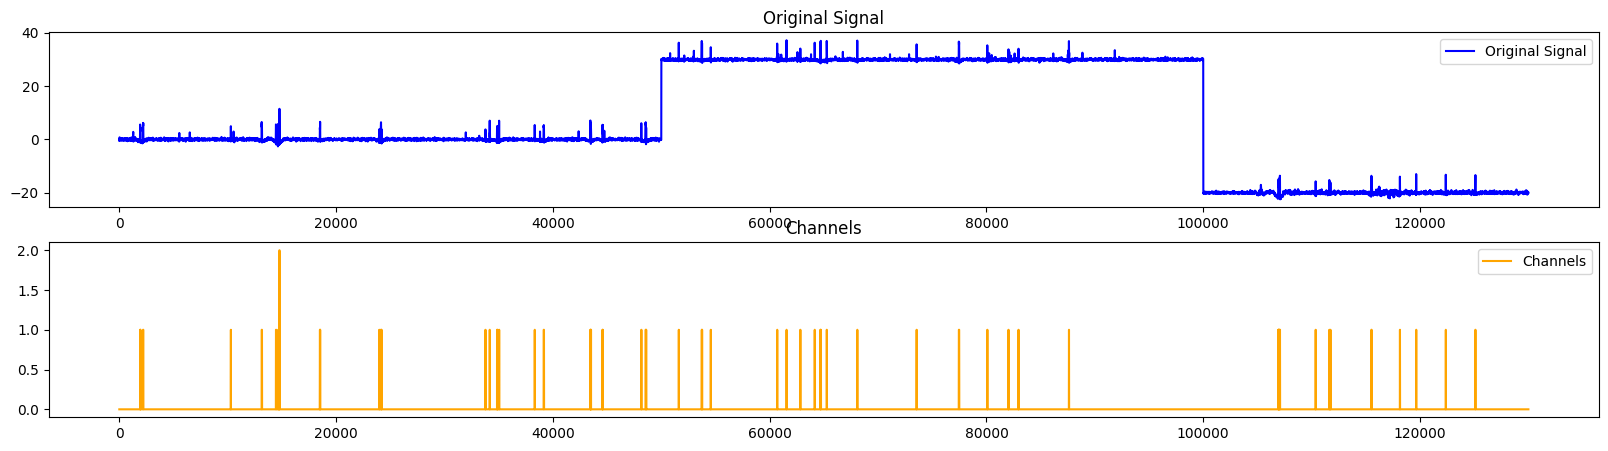

In [4]:
plot_signal_and_channels(st['signal'], st['chans'], delta=130000)
X_test = np.array(st['signal'][:20000])
y_test = np.array(st['chans'][0:20000])


In [5]:
# Read the data into a DataFrame
df = pd.read_csv('data_extracted/my_shifted_train_data.csv', header=None, names=['timestamp', 'signal', 'chans'])

df['signal_diff'] = df['signal'].diff().fillna(0) 
df['signal_rolling_mean'] = df['signal'].rolling(window=50).mean().bfill()

#X = st[["signal", 'signal_diff', 'signal_rolling_mean']]
X = df[["signal"]]
y = df["chans"]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
X_test

array([[-0.35542375],
       [-1.35301021],
       [-0.35969935],
       ...,
       [ 1.17609025],
       [-1.32146478],
       [-0.29206972]])

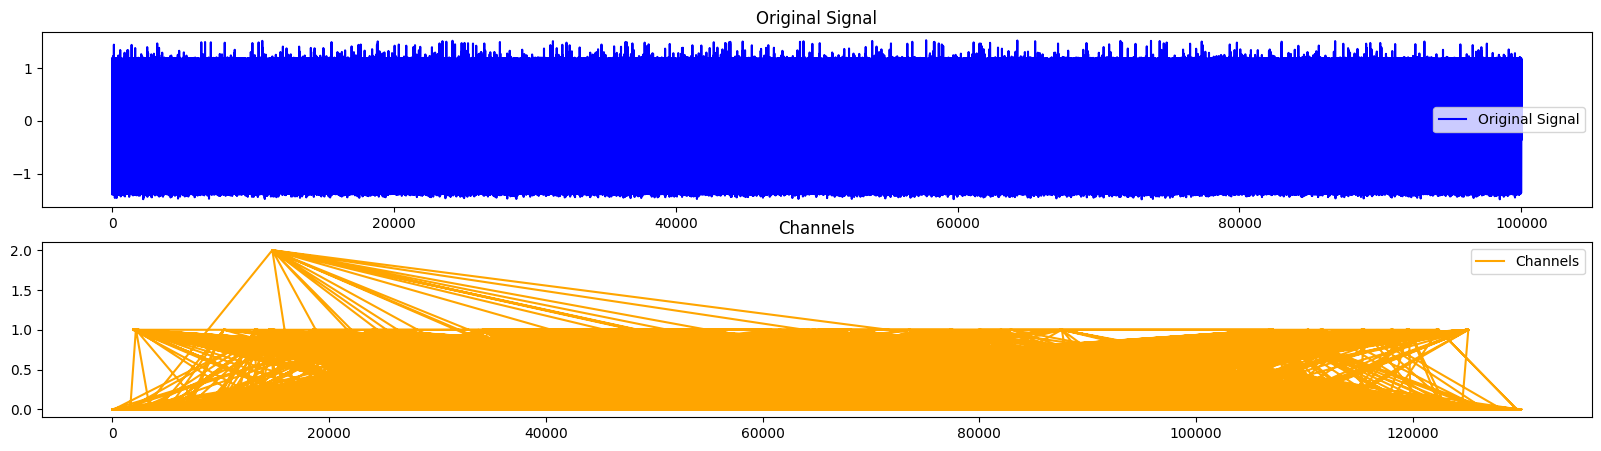

In [7]:
plot_signal_and_channels(X_train[:, 0], y_train, delta=100000)

In [8]:
# Train a decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_new = tree_model.predict(X_test)
mse_new = mean_squared_error(y_test, y_pred_new)
mse_new

3.846153846153846e-05

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

In [9]:
preds = tree_model.predict(X_test)

In [10]:
print(preds)

[0. 0. 0. ... 0. 0. 0.]


In [11]:
print(X_test)

[[-0.35542375]
 [-1.35301021]
 [-0.35969935]
 ...
 [ 1.17609025]
 [-1.32146478]
 [-0.29206972]]


In [12]:
print(y_test)

11661     0
105184    0
1550      0
30019     0
49324     0
         ..
91227     0
101618    0
97626     0
107865    0
39184     0
Name: chans, Length: 26000, dtype: int64


In [13]:
X_test

array([[-0.35542375],
       [-1.35301021],
       [-0.35969935],
       ...,
       [ 1.17609025],
       [-1.32146478],
       [-0.29206972]])

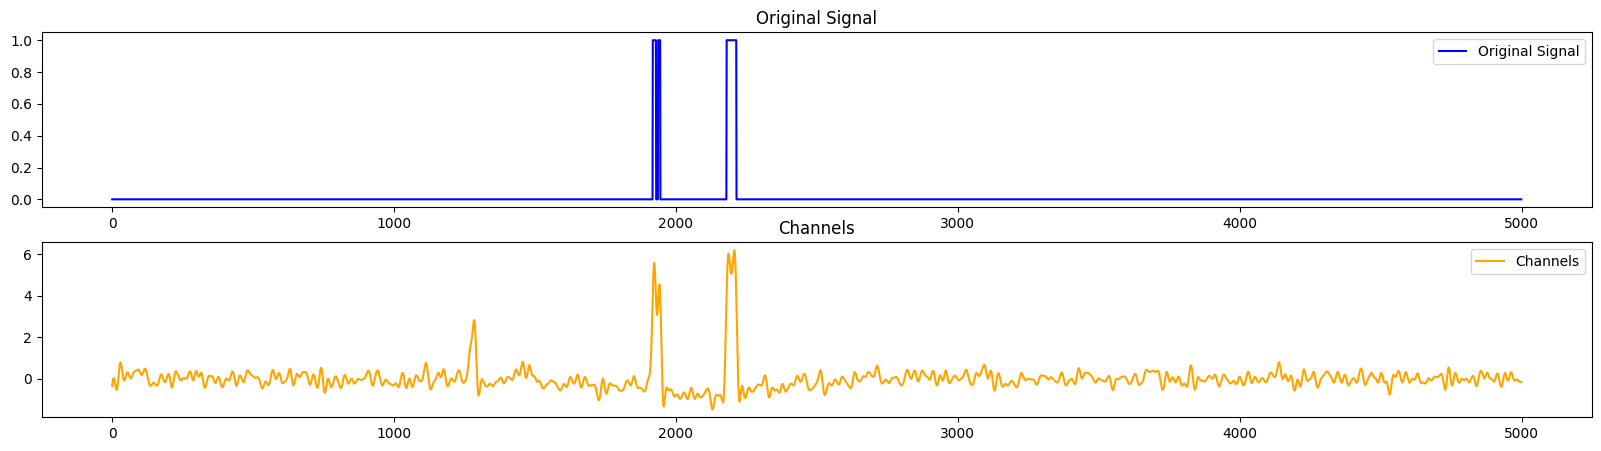

In [14]:
plot_signal_and_channels(y, X['signal'])

In [15]:
preds = tree_model.predict(X)

c:\Users\egrka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


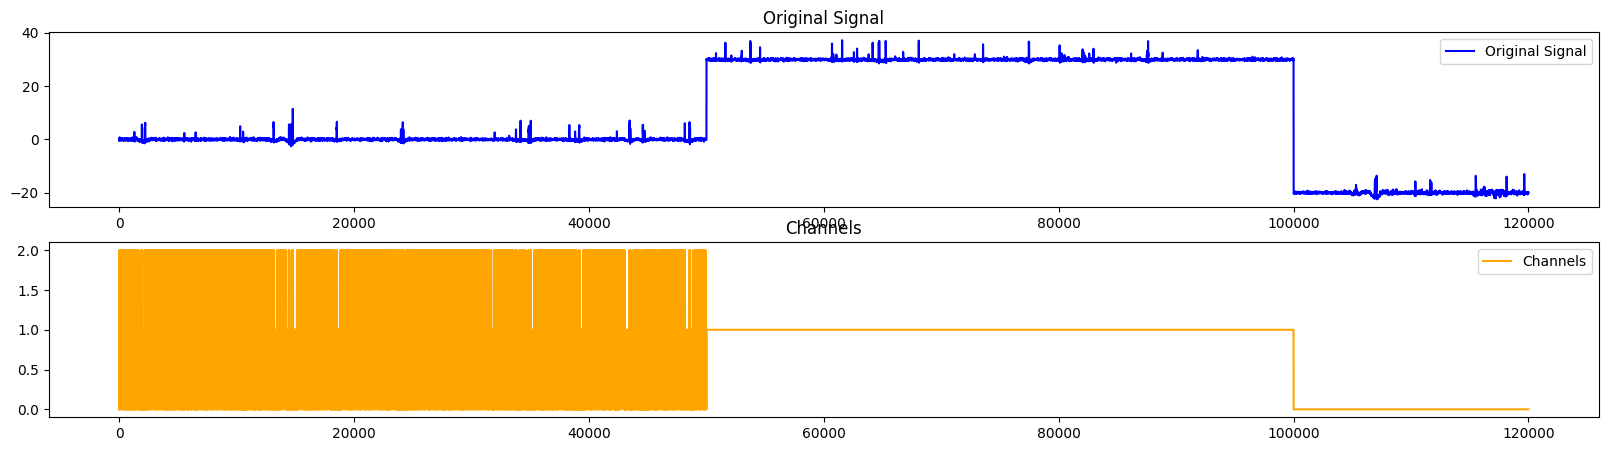

In [16]:
plot_signal_and_channels(X, preds, 0, 120000)

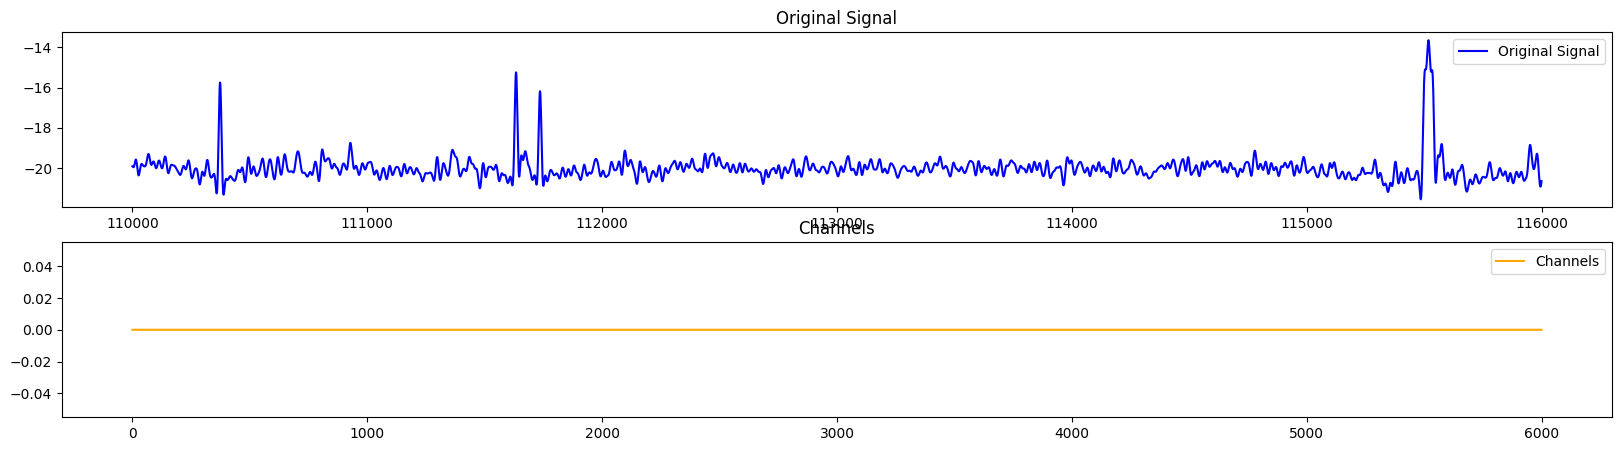

In [17]:
plot_signal_and_channels(X, preds, 110000, 6000)

In [19]:
mse_new = mean_squared_error(y, preds)
mse_new

0.9801613858568143

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y, preds)
print(f"R² Score: {r2}")

R² Score: -136.21082326928445
